In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Used Car Dataset (2).csv')
df.head()

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


In [ ]:
df.isnull().sum()

Unnamed: 0            0
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         3
engine(cc)            3
max_power(bhp)        3
torque(Nm)            4
price(in lakhs)       0
dtype: int64

In [ ]:
df=df.dropna()
df.isnull().sum()

Unnamed: 0            0
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         0
engine(cc)            0
max_power(bhp)        0
torque(Nm)            0
price(in lakhs)       0
dtype: int64

In [ ]:
#We Can drop un wanted rows in datasets
df = df.drop(['registration_year','Unnamed: 0','insurance_validity','car_name'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 0 to 1552
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuel_type           1549 non-null   object 
 1   seats               1549 non-null   int64  
 2   kms_driven          1549 non-null   int64  
 3   ownsership          1549 non-null   object 
 4   transmission        1549 non-null   object 
 5   manufacturing_year  1549 non-null   object 
 6   mileage(kmpl)       1549 non-null   float64
 7   engine(cc)          1549 non-null   float64
 8   max_power(bhp)      1549 non-null   float64
 9   torque(Nm)          1549 non-null   float64
 10  price(in lakhs)     1549 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 145.2+ KB


In [ ]:
df.duplicated().sum()

421

This code returns count of duplicated values in  dataset


In [ ]:
df.loc[df.duplicated]

,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
40,Diesel,6,35000,First Owner,Automatic,2021,12.40,1996.0,1996.0,21501.0,35.00
41,Petrol,5,100525,First Owner,Manual,2010,16.10,1197.0,1197.0,85.0,2.09
42,Petrol,5,83000,Second Owner,Automatic,2015,18.00,1497.0,1497.0,1173.0,6.25
43,Petrol,5,40191,Second Owner,Manual,2011,998.00,671.0,671.0,90.0,2.12
44,Diesel,5,62152,First Owner,Automatic,2015,18.53,1968.0,1968.0,18774.0,20.00
...,...,...,...,...,...,...,...,...,...,...,...
1503,Petrol,5,1800,First Owner,Manual,2013,20.36,1197.0,1197.0,789.0,3.15
1510,Petrol,5,34000,First Owner,Automatic,2019,16.00,1368.0,1368.0,16077.0,17.50
1511,Petrol,5,30000,First Owner,Automatic,2021,18.76,1462.0,1462.0,10326.0,11.40
1512,Petrol,5,22700,First Owner,Manual,2018,18.90,1197.0,1197.0,8186.0,5.45


In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

[link text](https:// [link text](https://))The code first removes duplicate rows from the DataFrame df using drop_duplicates(). Then, it checks for duplicated rows again using duplicated() and calculates the total number of duplicated rows using sum().







In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128 entries, 0 to 1552
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuel_type           1128 non-null   object 
 1   seats               1128 non-null   int64  
 2   kms_driven          1128 non-null   int64  
 3   ownsership          1128 non-null   object 
 4   transmission        1128 non-null   object 
 5   manufacturing_year  1128 non-null   object 
 6   mileage(kmpl)       1128 non-null   float64
 7   engine(cc)          1128 non-null   float64
 8   max_power(bhp)      1128 non-null   float64
 9   torque(Nm)          1128 non-null   float64
 10  price(in lakhs)     1128 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 105.8+ KB


In [ ]:
df.describe()

,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
count,1128.000000,1128.000000,1128.000000,1.128000e+03,1.128000e+03,1.128000e+03,1128.000000
mean,64.585993,53200.476064,221.602358,1.155693e+10,1.155693e+10,1.444631e+04,159.969645
std,1994.741434,43152.941581,557.876133,1.937907e+11,1.937907e+11,9.559605e+04,3511.506186
min,4.000000,620.000000,7.810000,1.700000e+01,1.700000e+01,5.000000e+00,1.000000
25%,5.000000,30000.000000,16.550000,1.197000e+03,1.197000e+03,4.275000e+02,4.500000
50%,5.000000,49000.000000,18.900000,1.461000e+03,1.461000e+03,1.176000e+03,6.750000
75%,5.000000,70000.000000,22.350000,1.991000e+03,1.991000e+03,8.850000e+03,14.787500
max,67000.000000,810000.000000,3996.000000,3.258640e+12,3.258640e+12,1.464800e+06,95000.000000


In [ ]:
#Check the values of fuel type coloumn
cdf = df['fuel_type']
cdf.value_counts()

Petrol     747
Diesel     363
CNG         17
5 Seats      1
Name: fuel_type, dtype: int64

In [ ]:
#Flitering fueltype column droping anomalies
drop_ft = df[df['fuel_type']=='5 Seats']
df = df.drop(drop_ft.index)
cdf = df['fuel_type']
cdf.value_counts()

Petrol    747
Diesel    363
CNG        17
Name: fuel_type, dtype: int64

In [ ]:
cdf = df['seats']
cdf.value_counts()

5    991
7    108
4     15
6     11
8      2
Name: seats, dtype: int64

count      1127.000000
mean      53246.087844
std       43144.887886
min         620.000000
25%       30000.000000
50%       49000.000000
75%       70000.000000
max      810000.000000
Name: kms_driven, dtype: float64

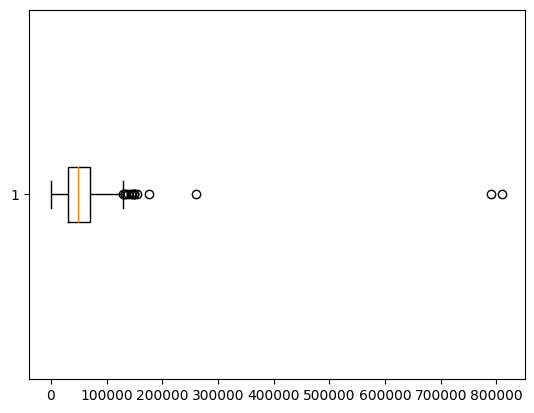

In [ ]:
cdf = df['kms_driven']
plt.boxplot(cdf,vert=False)
cdf.describe()

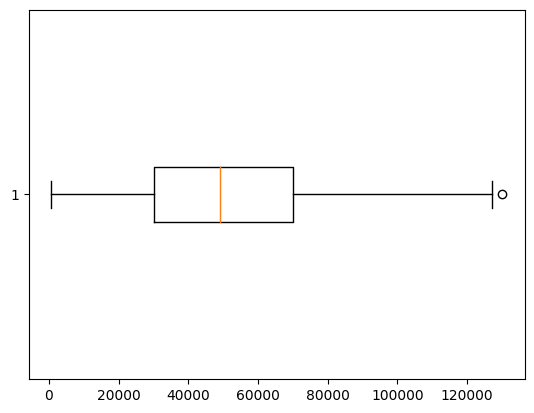

In [ ]:
Q1 = df['kms_driven'].quantile(0.25)
Q3 = df['kms_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define Lower and Upper Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and Remove Outliers
outliers = (df['kms_driven'] < lower_bound) | (df['kms_driven'] > upper_bound)
df = df[~outliers]

# Create a boxplot
plt.boxplot(df['kms_driven'], vert=False)

plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1113 entries, 0 to 1552
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuel_type           1113 non-null   object 
 1   seats               1113 non-null   int64  
 2   kms_driven          1113 non-null   int64  
 3   ownsership          1113 non-null   object 
 4   transmission        1113 non-null   object 
 5   manufacturing_year  1113 non-null   object 
 6   mileage(kmpl)       1113 non-null   float64
 7   engine(cc)          1113 non-null   float64
 8   max_power(bhp)      1113 non-null   float64
 9   torque(Nm)          1113 non-null   float64
 10  price(in lakhs)     1113 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 104.3+ KB


In [ ]:
label_encoder=LabelEncoder()
df['fuel_type']=label_encoder.fit_transform(df['fuel_type'])
df['ownsership']=label_encoder.fit_transform(df['ownsership'])
df['transmission']=label_encoder.fit_transform(df['transmission'])

In [ ]:
cdf = df['manufacturing_year']
cdf.value_counts()

2018                   172
2017                   133
2019                   131
2016                   100
2015                    98
2020                    91
2021                    88
2014                    75
2022                    65
2013                    40
2012                    32
Power Steering          23
2023                    22
2011                    19
2010                    13
2009                     9
Power Windows Front      1
2007                     1
Name: manufacturing_year, dtype: int64

In [ ]:
cd = ['Power Steering', 'Power Windows Front', 'Air Conditioner']

df = df[~df['manufacturing_year'].isin(cd)]

df['manufacturing_year'].value_counts()


2018    172
2017    133
2019    131
2016    100
2015     98
2020     91
2021     88
2014     75
2022     65
2013     40
2012     32
2023     22
2011     19
2010     13
2009      9
2007      1
Name: manufacturing_year, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7bb617c65e40>,
 'caps': [<matplotlib.lines.Line2D at 0x7bb617c67580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bb617c67c40>],
 'medians': [<matplotlib.lines.Line2D at 0x7bb617c67a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bb617c646a0>],
 'means': []}

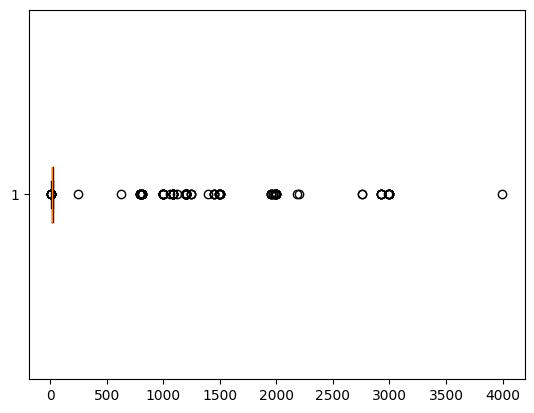

In [ ]:
#mileage cant be above 100
cdf = df['mileage(kmpl)']
plt.boxplot(cdf,vert=False)

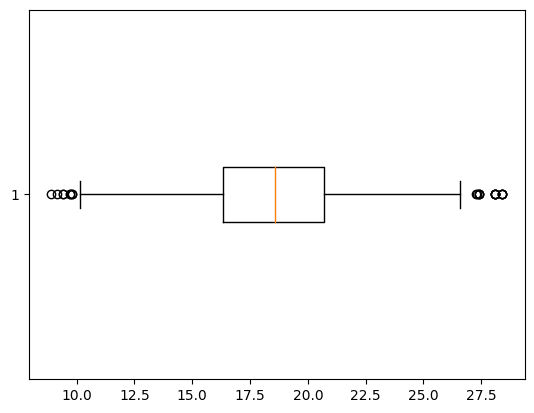

In [ ]:
Q1 = df['mileage(kmpl)'].quantile(0.25)
Q3 = df['mileage(kmpl)'].quantile(0.75)
IQR = Q3 - Q1

# Define Lower and Upper Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and Remove Outliers
outliers = (df['mileage(kmpl)'] < lower_bound) | (df['mileage(kmpl)'] > upper_bound)
df = df[~outliers]

# Create a boxplot
plt.boxplot(df['mileage(kmpl)'], vert=False)

plt.show()


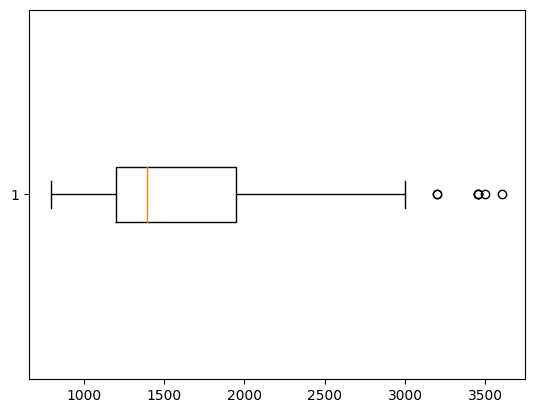

In [ ]:
cdf = df['engine(cc)']
plt.boxplot(cdf,vert=False)
plt.show()

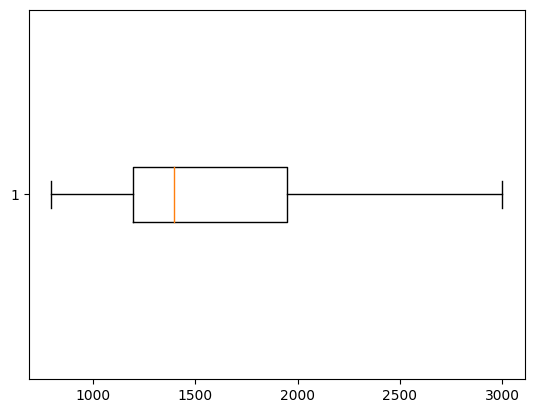

In [ ]:
Q1 = df['engine(cc)'].quantile(0.25)
Q3 = df['engine(cc)'].quantile(0.75)
IQR = Q3 - Q1

# Define Lower and Upper Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and Remove Outliers
outliers = (df['engine(cc)'] < lower_bound) | (df['engine(cc)'] > upper_bound)
df = df[~outliers]

# Create a boxplot
plt.boxplot(df['engine(cc)'], vert=False)

plt.show()


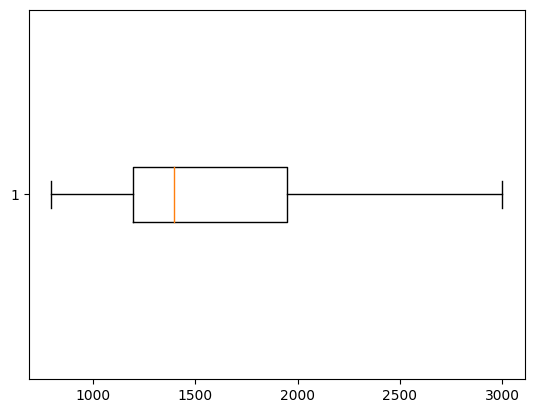

In [ ]:
cdf = df['max_power(bhp)']
plt.boxplot(cdf,vert=False)
plt.show()

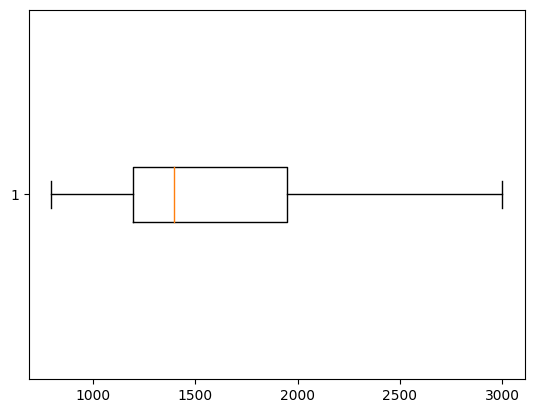

In [ ]:
Q1 = df['max_power(bhp)'].quantile(0.25)
Q3 = df['max_power(bhp)'].quantile(0.75)
IQR = Q3 - Q1

# Define Lower and Upper Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and Remove Outliers
outliers = (df['max_power(bhp)'] < lower_bound) | (df['max_power(bhp)'] > upper_bound)
df = df[~outliers]

# Create a boxplot
plt.boxplot(df['max_power(bhp)'], vert=False)

plt.show()

In [ ]:
cdf.describe()

count     939.000000
mean     1547.555911
std       503.491699
min       796.000000
25%      1197.000000
50%      1396.000000
75%      1950.000000
max      2999.000000
Name: max_power(bhp), dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7bb61598d270>,
 'caps': [<matplotlib.lines.Line2D at 0x7bb61598d1e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bb61598e560>],
 'medians': [<matplotlib.lines.Line2D at 0x7bb61598e140>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bb61598e4d0>],
 'means': []}

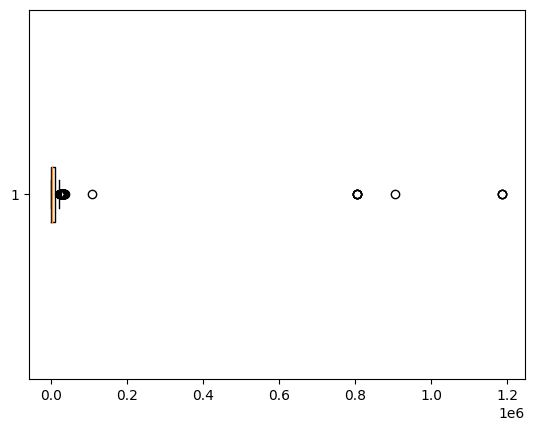

In [ ]:
cd = df['torque(Nm)']
plt.boxplot(cd,vert=False)

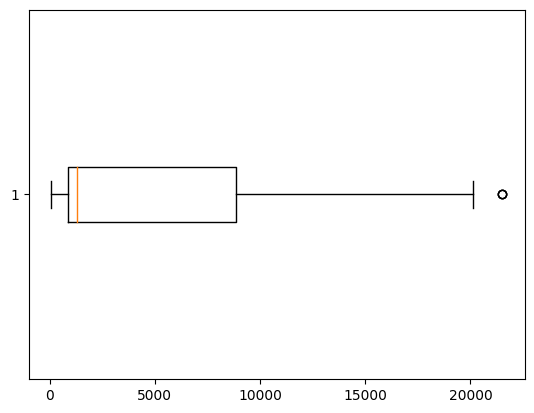

In [ ]:
Q1 = df['torque(Nm)'].quantile(0.25)
Q3 = df['torque(Nm)'].quantile(0.75)
IQR = Q3 - Q1

# Define Lower and Upper Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and Remove Outliers
outliers = (df['torque(Nm)'] < lower_bound) | (df['torque(Nm)'] > upper_bound)
df = df[~outliers]

# Create a boxplot
plt.boxplot(df['torque(Nm)'], vert=False)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

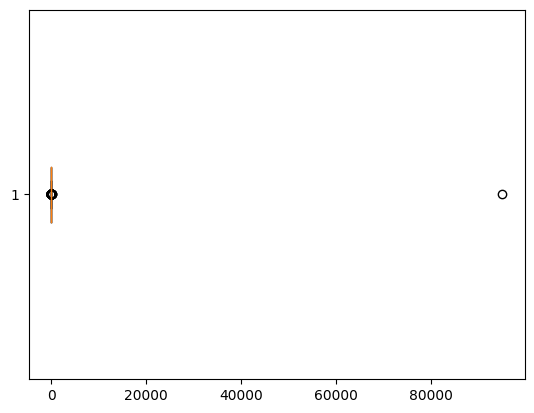

In [ ]:
cdf = df['price(in lakhs)']
plt.boxplot(cdf,vert=False)
plt.show


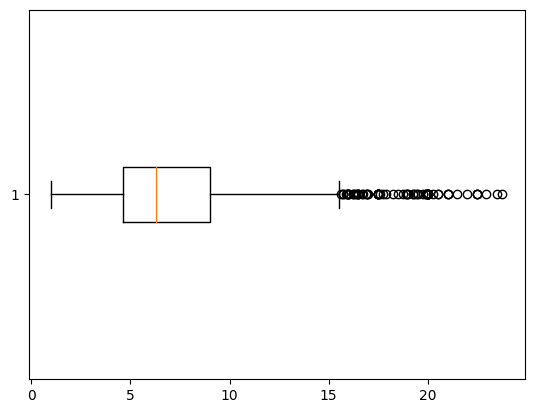

In [ ]:
Q1 = df['price(in lakhs)'].quantile(0.25)
Q3 = df['price(in lakhs)'].quantile(0.75)
IQR = Q3 - Q1

# Define Lower and Upper Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and Remove Outliers
outliers = (df['price(in lakhs)']< lower_bound) | (df['price(in lakhs)'] > upper_bound)
df = df[~outliers]

# Create a boxplot
plt.boxplot(df['price(in lakhs)'], vert=False)

plt.show()

In [ ]:
x=df.drop('price(in lakhs)',axis=1)
y=df['price(in lakhs)']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(620, 10)
(620,)
(156, 10)
(156,)


In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
model=Sequential()

#input
model.add(Dense(10,activation="relu"))

#hidden layers
model.add(Dense(50,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(50,activation="relu"))
#output
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=x_train,y=y_train.values,validation_data=(x_test,y_test.values),batch_size=256,epochs=200)
model.summary()


Epoch 1/200
3/3 [==============================] - 0s 66ms/step - loss: 1.6811 - val_loss: 6.2183
Epoch 2/200
3/3 [==============================] - 0s 20ms/step - loss: 1.6813 - val_loss: 6.0693
Epoch 3/200
3/3 [==============================] - 0s 17ms/step - loss: 1.6891 - val_loss: 6.0772
Epoch 4/200
3/3 [==============================] - 0s 26ms/step - loss: 1.6844 - val_loss: 6.4699
Epoch 5/200
3/3 [==============================] - 0s 19ms/step - loss: 1.6896 - val_loss: 6.0876
Epoch 6/200
3/3 [==============================] - 0s 19ms/step - loss: 1.6635 - val_loss: 6.2113
Epoch 7/200
3/3 [==============================] - 0s 18ms/step - loss: 1.6650 - val_loss: 6.1893
Epoch 8/200
3/3 [==============================] - 0s 18ms/step - loss: 1.6623 - val_loss: 6.2677
Epoch 9/200
3/3 [==============================] - 0s 18ms/step - loss: 1.6364 - val_loss: 5.8972
Epoch 10/200
3/3 [==============================] - 0s 18ms/step - loss: 1.6520 - val_loss: 6.0569
Epoch 11/200
3/3 [=

In [ ]:
car=df.drop('price(in lakhs)',axis=1).iloc[0]
print(car)
car=scaler.fit_transform(car.values.reshape(-1,10))
print('\nPrediction Price:',model.predict(car))

print('\nOriginal Price:',df.iloc[0]['price(in lakhs)'])


# Assuming you have trained your model and have x_test, y_test, and the model itself

# Make predictions
y_tpred=model.predict(x_train)
tmse = mean_squared_error(y_train, y_tpred)
trmse = np.sqrt(tmse)

y_pred = model.predict(x_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

print("Training Mean Squared Error:", tmse)
print("Training Root Mean Squared Error:", trmse)

fuel_type                  2
seats                      5
kms_driven             30615
ownsership                18
transmission              10
manufacturing_year      2020
mileage(kmpl)           17.4
engine(cc)             999.0
max_power(bhp)         999.0
torque(Nm)            9863.0
Name: 1, dtype: object
1/1 [==============================] - 0s 32ms/step

Prediction Price: [[5.050154]]

Original Price: 8.99
1/1 [==============================] - 0s 36ms/step
[[0.43824756]]
5/5 [==============================] - 0s 4ms/step
Mean Squared Error: 5.471702271802253
Root Mean Squared Error: 2.3391670038289814
Training Mean Squared Error: 0.8955385564945371
Training Root Mean Squared Error: 0.9463289895668087
